Binary Information at transmitter:
[1 1 0 1 0 1]
Binary Information at Receiver:
[1. 1. 0. 1. 0. 1.]


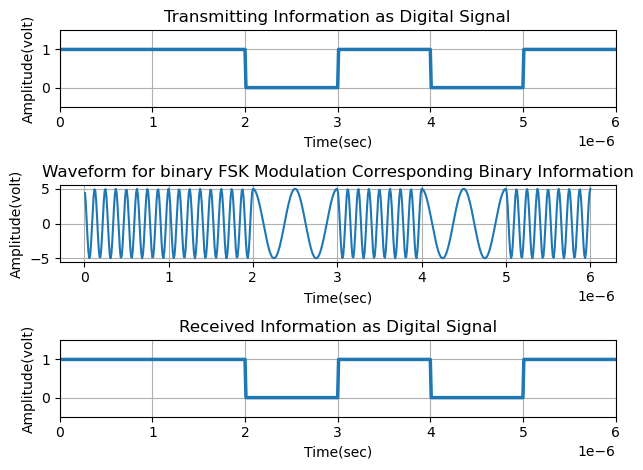

In [74]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 1, 0, 1, 0, 1])
bp = 0.000001
print('Binary Information at transmitter:')
print(x)

# Representation of Transmitting binary information as digital signal
bit = np.array([])

for n in range(len(x)):
    if x[n] == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))

t1 = np.arange(bp/100, 100*len(x)*(bp/100) + bp/100, bp/100)

plt.subplot(311)
plt.plot(t1, bit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp*len(x), -0.5, 1.5])
plt.ylabel('Amplitude(volt)')
plt.xlabel('Time(sec)')
plt.title('Transmitting Information as Digital Signal')

# Binary FSK Modulation
A = 5
br = 1 / bp
f1 = br * 8
f2 = br * 2
t2 = np.arange(bp / 99, bp + bp / 99, bp / 99)
ss = len(t2)
m = np.array([])

for i in range(len(x)):
    if x[i] == 1:
        y = A * np.cos(2 * np.pi * f1 * t2)
    else:
        y = A * np.cos(2 * np.pi * f2 * t2)
    m = np.concatenate((m, y))

t3 = np.arange(bp / 99, bp * len(x) + bp / 99, bp / 99)
plt.subplot(312)
plt.plot(t3, m)
plt.grid(True)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude(volt)')
plt.title('Waveform for binary FSK Modulation Corresponding Binary Information')

# Binary FSK Demodulation
mn = np.array([])

for n in range(ss - 1, len(m), ss):
    t = np.arange(bp / 99, bp + bp / 99, bp / 99)
    y1 = np.cos(2 * np.pi * f1 * t)
    y2 = np.cos(2 * np.pi * f2 * t)
    mm = y1 * m[n - (ss - 1) : n + 1]
    mmm = y2 * m[n - (ss - 1) : n + 1]
    t4 = np.arange(bp / 99, bp + bp / 99, bp / 99)
    z1 = np.trapz(mm, t4)
    z2 = np.trapz(mmm, t4)
    zz1 = round((2 * z1 / bp))
    zz2 = round((2 * z2 / bp))
    if zz1 > A / 2:
        a = 1
    else:
        a = 0
    mn = np.concatenate((mn, [a]))

print('Binary Information at Receiver:')
print(mn)

# Representation of Binary Data Into Digital Signal
bit = np.array([])

for n in range(len(mn)):
    if mn[n] == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))

t4 = np.arange(bp / 100, 100 * len(mn) * (bp / 100) + bp / 100, bp / 100)

plt.subplot(313)
plt.plot(t4, bit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp * len(mn), -0.5, 1.5])
plt.ylabel('Amplitude(volt)')
plt.xlabel('Time(sec)')
plt.title('Received Information as Digital Signal')

plt.tight_layout()
plt.show()


In [58]:
binary_code = [1, 0, 1, 0, 1, 0, 1, 0, 1]
b_len = 9
binary_code_arr = np.array(binary_code)
id_n = np.where(binary_code_arr == 1)
print(id_n[0])
    

[0 2 4 6 8]


In [60]:
print(np.zeros(9))

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
